In [1]:
import sys
import cv2
sys.path.insert(1, '../../src/')
import matplotlib.pyplot as plt
from models.rtmpose.model import RTMPoseModel
from rtmlib import draw_skeleton
import copy 

# Read image

(3024, 4032, 3)


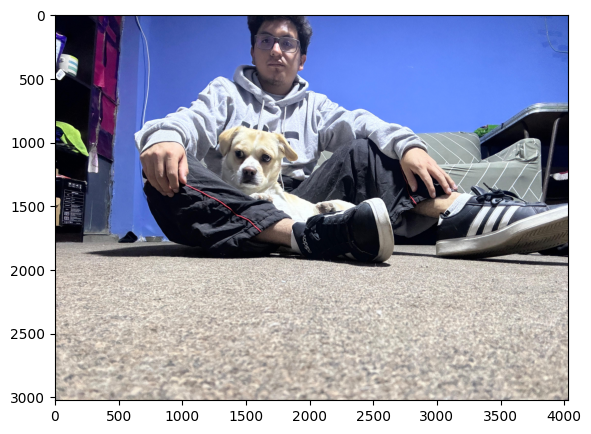

In [2]:
img     = cv2.imread("../../data/images/image_1.jpeg")
print(img.shape)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


fig=plt.figure(figsize=(10,5))
plt.imshow(img_rgb)
plt.show()

# Load model

In [13]:
#model = RTMPoseModel()
model = RTMPoseModel(filtering=False,mode='robust',backend='onnxruntime')

onnx_model: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/onnx_sdk/yolox_m_8xb8-300e_humanart-c2c7a14a.zip
onnx_model: /home/cristian/.cache/rtmlib/hub/checkpoints/yolox_m_8xb8-300e_humanart-c2c7a14a.onnx
load /home/cristian/.cache/rtmlib/hub/checkpoints/yolox_m_8xb8-300e_humanart-c2c7a14a.onnx with onnxruntime backend
onnx_model: /media/cristian/12FF1F6D0CD48422/Research/Gloss/Gloss/Pruebas_antiguas/RTMPOSE/juxtapose/model/rtmpose-x.onnx
onnx_model: /media/cristian/12FF1F6D0CD48422/Research/Gloss/Gloss/Pruebas_antiguas/RTMPOSE/juxtapose/model/rtmpose-x.onnx


2024-05-11 01:11:15.260381049 [W:onnxruntime:, session_state.cc:1166 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2024-05-11 01:11:15.260397455 [W:onnxruntime:, session_state.cc:1168 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.
2024-05-11 01:11:15.546559737 [W:onnxruntime:, session_state.cc:1166 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2024-05-11 01:11:15.546573514 [W:onnxruntime:, session_state.cc:1168 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


load /media/cristian/12FF1F6D0CD48422/Research/Gloss/Gloss/Pruebas_antiguas/RTMPOSE/juxtapose/model/rtmpose-x.onnx with onnxruntime backend


In [14]:
keypoints, scores = model.predict(frame_rgb=img_rgb)

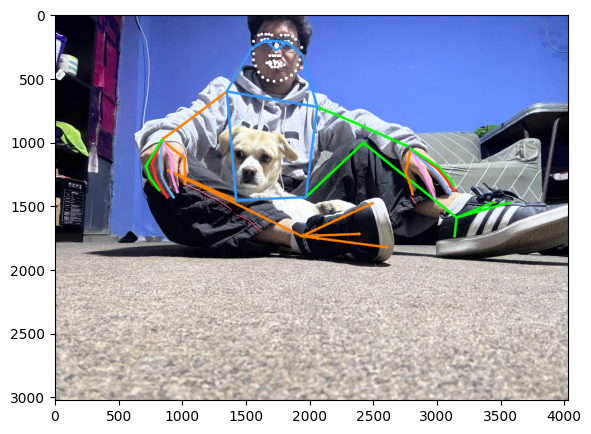

In [15]:
img_rgb_new2 = copy.deepcopy(img_rgb)
img_rgb_new2 = draw_skeleton(img_rgb_new2, keypoints, scores, kpt_thr=0.5,
                             line_width=18,radius=12)

fig=plt.figure(figsize=(10,5))
plt.imshow(img_rgb_new2)
plt.show()


In [16]:
keypoints.shape,scores.shape

((1, 133, 2), (1, 133))

In [17]:
type(keypoints),type(scores)

(numpy.ndarray, numpy.ndarray)

In [12]:
keypoints[0][:5],scores[0][:5]

(array([[1734.19840495,  270.92564774],
        [1822.74705844,  214.57650312],
        [1661.74950663,  198.47674751],
        [1935.44534471,  327.27479235],
        [1557.10109795,  270.92564774]]),
 array([7.58733  , 8.041261 , 7.9865246, 7.2075744, 6.1670914],
       dtype=float32))

In [18]:
keypoints[0][:5],scores[0][:5]

(array([[1734.19840495,  278.97552554],
        [1822.74705844,  214.57650312],
        [1653.69962904,  198.47674751],
        [1943.4952223 ,  319.22491455],
        [1541.00134277,  262.87576993]]),
 array([9.520639, 9.632618, 9.407796, 9.042816, 9.024948], dtype=float32))